# Objective 

Event modeling using 10000 events

# Experiment description

* Chosen metric details (See: calib_metriceval_v2.ipynb): **exp7 - Daily KGE, 1 day smoothing, kge_a_alpha = 1.**
* 4 model runs
    * FUSE-PRMS
    * FUSE-HECHMS
    * FUSE-VIC
    * FUSE-SACSMA
    
# Conclusion
TBD

In [1]:
import glob,os
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import scipy.stats
import seaborn as sns

In [2]:
outdir = '/glade/p/work/manab/ff/islandpark/output/event'
prms = sorted(glob.glob(outdir + '/*_111_runs_best*.nc'))
hechms = sorted(glob.glob(outdir + '/*_222_runs_best*.nc'))
vic = sorted(glob.glob(outdir + '/*_333_runs_best*.nc'))
sacsma = sorted(glob.glob(outdir + '/*_444_runs_best*.nc'))

prmsparam = sorted(glob.glob(outdir + '/*_111_para_best*.nc'))
hechmsparam = sorted(glob.glob(outdir + '/*_222_para_best*.nc'))
vicparam = sorted(glob.glob(outdir + '/*_333_para_best*.nc'))
sacsmaparam = sorted(glob.glob(outdir + '/*_444_para_best*.nc'))

In [3]:
def dextract(nclist):
    '''Extract daily flows
    '''
    ncdat = np.empty([8,])
    for count, value in enumerate(nclist):
        
        ncout = xr.open_dataset(value)
        q = ncout['q_routed'].values.flatten()
        ncdat = np.c_[ncdat, q]

    ncdat = np.delete(ncdat,(0), axis=1)
    return(ncdat)

def maxextract(nclist):
    '''Extract maximum daily flows in the entire period
    '''
    ncdat = []
    for count, value in enumerate(nclist):
        ncout = xr.open_dataset(value)
        q = ncout['q_routed'].values.max()
        ncdat.append(q) 
    print('Finished extraction!')
    return(ncdat)

In [ ]:
prmsdflow = dextract(prms)
hechmsdflow = dextract(hechms)
vicdflow = dextract(vic)
sacsmadflow = dextract(sacsma)

In [4]:
prmsmaxflow = maxextract(prms)
hechmsmaxflow = maxextract(hechms)
vicmaxflow = maxextract(vic)
sacsmamaxflow = maxextract(sacsma)

Finished extraction!
Finished extraction!
Finished extraction!
Finished extraction!


In [5]:
def dailypdf(nclist, ptitle, psave):
    
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(10,8)) 
    sns.kdeplot(np.array(nclist[0]), bw=0.5, label='Day 1')
    sns.kdeplot(np.array(nclist[1]), bw=0.5, label='Day 2')
    sns.kdeplot(np.array(nclist[2]), bw=0.5, label='Day 3')
    sns.kdeplot(np.array(nclist[3]), bw=0.5, label='Day 4')
    sns.kdeplot(np.array(nclist[4]), bw=0.5, label='Day 5')
    sns.kdeplot(np.array(nclist[5]), bw=0.5, label='Day 6')
    sns.kdeplot(np.array(nclist[6]), bw=0.5, label='Day 7')
    sns.kdeplot(np.array(nclist[7]), bw=0.5, label='Day 8')
    plt.ylabel('Cumulative frequency (%)')
    plt.xlabel('Streamflow')
    plt.title(ptitle)
    plt.savefig(psave, bbox_inches='tight', dpi=300)
    plt.show()
    
def modeldailypdf(nclist1, nclist2, nclist3, day, ptitle, psave):
    
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(10,8)) 
    sns.kdeplot(np.array(nclist1[day]), bw=0.5, label='HEC-HMS')
    sns.kdeplot(np.array(nclist2[day]), bw=0.5, label='VIC')
    sns.kdeplot(np.array(nclist3[day]), bw=0.5, label='SAC-SMA')
    plt.ylabel('Cumulative frequency (%)')
    plt.xlabel('Streamflow')
    plt.title(ptitle)
    plt.savefig(psave, bbox_inches='tight', dpi=300)
    plt.show()
    
def modelmaxpdf(nclist1, nclist2, nclist3, nclist4, ptitle, psave):
    '''Plots the maximum flows in the entire periods
    '''    
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(10,8)) 
    sns.kdeplot(np.array(nclist1), bw=0.5, label='PRMS')
    sns.kdeplot(np.array(nclist2), bw=0.5, label='HEC-HMS')
    sns.kdeplot(np.array(nclist3), bw=0.5, label='VIC')
    sns.kdeplot(np.array(nclist4), bw=0.5, label='SAC-SMA')
    plt.ylabel('Cumulative frequency (%)')
    plt.xlabel('Streamflow')
    plt.title(ptitle)
    plt.savefig(psave, bbox_inches='tight', dpi=300)
    plt.show()

In [6]:
modeldailypdf(hechmsdflow, vicdflow, sacsmadflow, 0, 
         'PDF of day 1 flows, 10K ensembles', 'figures/modelpdfday1.png')
modeldailypdf(hechmsdflow, vicdflow, sacsmadflow, 1, 
         'PDF of day 2 flows, 10K ensembles', 'figures/modelpdfday2.png')
modeldailypdf(hechmsdflow, vicdflow, sacsmadflow, 2, 
         'PDF of day 3 flows, 10K ensembles', 'figures/modelpdfday3.png')
modeldailypdf(hechmsdflow, vicdflow, sacsmadflow, 3, 
         'PDF of day 4 flows, 10K ensembles', 'figures/modelpdfday4.png')
modeldailypdf(hechmsdflow, vicdflow, sacsmadflow, 4, 
         'PDF of day 5 flows, 10K ensembles', 'figures/modelpdfday5.png')
modeldailypdf(hechmsdflow, vicdflow, sacsmadflow, 5, 
         'PDF of day 6 flows, 10K ensembles', 'figures/modelpdfday6.png')
modeldailypdf(hechmsdflow, vicdflow, sacsmadflow, 6, 
         'PDF of day 7 flows, 10K ensembles', 'figures/modelpdfday7.png')
modeldailypdf(hechmsdflow, vicdflow, sacsmadflow, 7, 
         'PDF of day 8 flows, 10K ensembles', 'figures/modelpdfday8.png')

NameError: name 'hechmsdflow' is not defined

In [ ]:
dailypdf(prmsdflow, 'PDF of daily flows, 10K ensembles, (FUSE-PRMS)', 'figures/pdfprms.png')
dailypdf(hechmsdflow, 'PDF of daily flows, 10K ensembles (FUSE-HECHMS)', 'figures/pdfhechms.png')
dailypdf(vicdflow, 'PDF of daily flows, 10K ensembles (FUSE-VIC)', 'figures/pdfvic.png')
dailypdf(sacsmadflow, 'PDF of daily flows, 10K ensembles (FUSE-SACSMA)', 'figures/pdfsacsma.png')

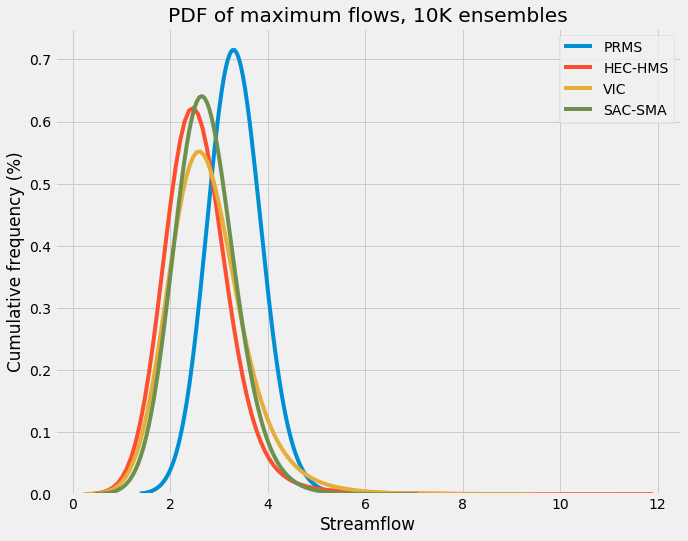

In [7]:
modelmaxpdf(prmsmaxflow, hechmsmaxflow, vicmaxflow, sacsmamaxflow,
         'PDF of maximum flows, 10K ensembles', 'figures/maxflows.png')

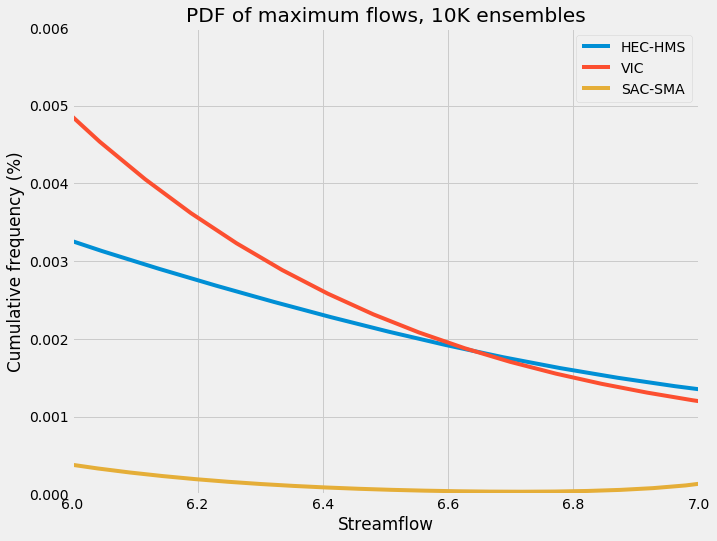

In [8]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8)) 
sns.kdeplot(np.array(hechmsmaxflow), bw=0.5, label='HEC-HMS')
sns.kdeplot(np.array(vicmaxflow), bw=0.5, label='VIC')
sns.kdeplot(np.array(sacsmamaxflow), bw=0.5, label='SAC-SMA')
plt.ylabel('Cumulative frequency (%)')
plt.xlabel('Streamflow')
plt.title('PDF of maximum flows, 10K ensembles')
plt.ylim(0, 0.006)
plt.xlim(6,7)
#plt.yscale('log')
#plt.savefig(psave, bbox_inches='tight', dpi=300)
plt.show()

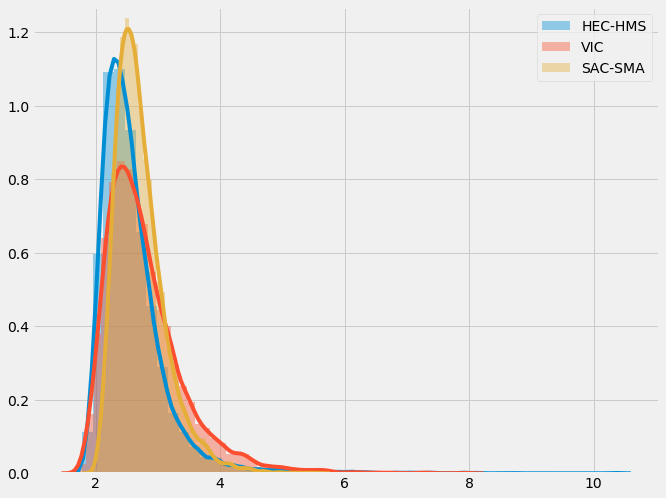

In [9]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8)) 
sns.distplot(np.array(hechmsmaxflow), label='HEC-HMS')
sns.distplot(np.array(vicmaxflow), label='VIC')
sns.distplot(np.array(sacsmamaxflow), label='SAC-SMA')
plt.legend()
# plt.show()

# Descriptive statistics 

In [265]:
stats = {}
stats['Mean of maximum 8-day streamflows (PRMS)'] = np.mean(prmsmaxflow)
stats['Mean of maximum 8-day streamflows (HEC-HMS)'] = np.mean(hechmsmaxflow)
stats['Mean of maximum 8-day streamflows (VIC)'] = np.mean(vicmaxflow)
stats['Mean of maximum 8-day streamflows (SAC-SMA)'] = np.mean(sacsmamaxflow)

stats['95th percentile of maximum 8-day streamflows (PRMS)'] = np.percentile(prmsmaxflow, 95)
stats['95th percentile of maximum 8-day streamflows (HEC-HMS)'] = np.percentile(hechmsmaxflow, 95)
stats['95th percentile of maximum 8-day streamflows (VIC)'] = np.percentile(vicmaxflow, 95)
stats['95th percentile of maximum 8-day streamflows (SAC-SMA)'] = np.percentile(sacsmamaxflow, 95)

print('\n RANGE of streamflow values for 10K ensembles')
for x in stats:
    print (x,':',stats[x])


 RANGE of streamflow values for 10K ensembles
Mean of maximum 8-day streamflows (PRMS) : 3.32929
Mean of maximum 8-day streamflows (HEC-HMS) : 2.58926
Mean of maximum 8-day streamflows (VIC) : 2.78608
Mean of maximum 8-day streamflows (SAC-SMA) : 2.72591
95th percentile of maximum 8-day streamflows (PRMS) : 3.81886923313
95th percentile of maximum 8-day streamflows (HEC-HMS) : 3.49966102839
95th percentile of maximum 8-day streamflows (VIC) : 4.01904215813
95th percentile of maximum 8-day streamflows (SAC-SMA) : 3.50528804064


# Histogram of different  models

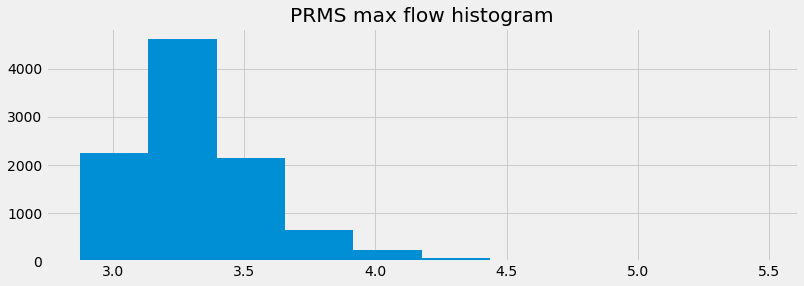

{'bin': 1, 'Min in bin': '2.88', 'Max in bin': '3.4', 'Frequency': 6872, 'Percentage': '68.72'}
{'bin': 2, 'Min in bin': '3.4', 'Max in bin': '3.92', 'Frequency': 2789, 'Percentage': '27.89'}
{'bin': 3, 'Min in bin': '3.92', 'Max in bin': '4.44', 'Frequency': 300, 'Percentage': '3.0'}
{'bin': 4, 'Min in bin': '4.44', 'Max in bin': '4.96', 'Frequency': 31, 'Percentage': '0.31'}
{'bin': 5, 'Min in bin': '4.96', 'Max in bin': '5.48', 'Frequency': 8, 'Percentage': '0.08'}


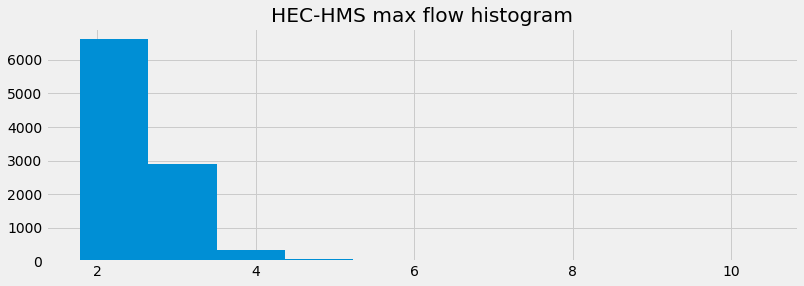

{'bin': 1, 'Min in bin': '1.78', 'Max in bin': '3.51', 'Frequency': 9506, 'Percentage': '95.06'}
{'bin': 2, 'Min in bin': '3.51', 'Max in bin': '5.23', 'Frequency': 429, 'Percentage': '4.29'}
{'bin': 3, 'Min in bin': '5.23', 'Max in bin': '6.95', 'Frequency': 48, 'Percentage': '0.48'}
{'bin': 4, 'Min in bin': '6.95', 'Max in bin': '8.68', 'Frequency': 14, 'Percentage': '0.14'}
{'bin': 5, 'Min in bin': '8.68', 'Max in bin': '10.4', 'Frequency': 3, 'Percentage': '0.03'}


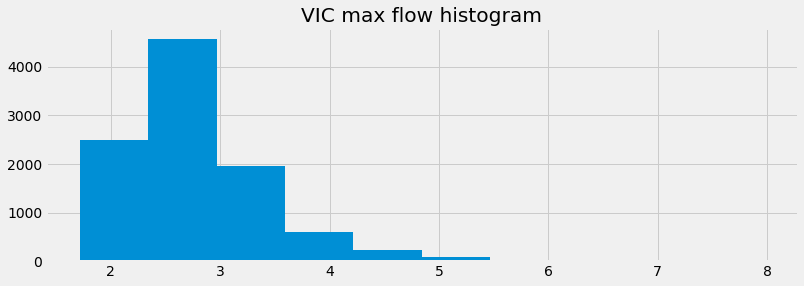

{'bin': 1, 'Min in bin': '1.72', 'Max in bin': '2.97', 'Frequency': 7061, 'Percentage': '70.61'}
{'bin': 2, 'Min in bin': '2.97', 'Max in bin': '4.22', 'Frequency': 2572, 'Percentage': '25.72'}
{'bin': 3, 'Min in bin': '4.22', 'Max in bin': '5.47', 'Frequency': 308, 'Percentage': '3.08'}
{'bin': 4, 'Min in bin': '5.47', 'Max in bin': '6.72', 'Frequency': 48, 'Percentage': '0.48'}
{'bin': 5, 'Min in bin': '6.72', 'Max in bin': '7.97', 'Frequency': 11, 'Percentage': '0.11'}


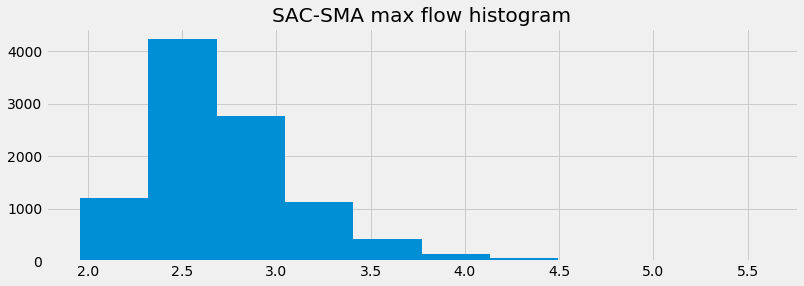

{'bin': 1, 'Min in bin': '1.96', 'Max in bin': '2.68', 'Frequency': 5440, 'Percentage': '54.4'}
{'bin': 2, 'Min in bin': '2.68', 'Max in bin': '3.41', 'Frequency': 3901, 'Percentage': '39.01'}
{'bin': 3, 'Min in bin': '3.41', 'Max in bin': '4.13', 'Frequency': 562, 'Percentage': '5.62'}
{'bin': 4, 'Min in bin': '4.13', 'Max in bin': '4.86', 'Frequency': 84, 'Percentage': '0.84'}
{'bin': 5, 'Min in bin': '4.86', 'Max in bin': '5.58', 'Frequency': 13, 'Percentage': '0.13'}


In [268]:
def histDetails(flowdat, ptitle, binsize):
    '''Prints out details of a histogram 
    
    flowdat = Array with all flows
    ptitle = Title of the plot
    hst = Histogram computed separately
    edges = bin edges
    example: hst, edges = np.histogram(testdata)
    '''
    
    # Make histogram
    hst, edges = np.histogram(flowdat, bins=binsize)

    # Calculate all histogram details and store in a list
    histlist = []
    for count, value in enumerate(hst):
        perc = str(round((hst[count]/sum(hst))*100, 2))  # Calculates percentage of each bin compared to the total
        case = {'bin': count+1, 'Min in bin': str(round(edges[count],2)), 
                'Max in bin': str(round(edges[count+1], 2)),'Frequency': hst[count], 'Percentage': perc}
        histlist.append(case)

    # Histogram plot
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(12, 4)) 
    plt.hist(flowdat, bins=10)
    plt.title(ptitle)
    plt.show()
        
    # Printing out all elements in the histogram detail list
    for elem in histlist:
        print(elem)
        

histDetails(prmsmaxflow, 'PRMS max flow histogram', binsize=5) 
histDetails(hechmsmaxflow, 'HEC-HMS max flow histogram', binsize=5) 
histDetails(vicmaxflow, 'VIC max flow histogram', binsize=5) 
histDetails(sacsmamaxflow, 'SAC-SMA max flow histogram', binsize=5) 

# Intercomparison of models using high flows using histogram (bins=10)

In [270]:
bins = 5
hist1, bin_edges1 = np.histogram(prmsmaxflow, bins)
hist2, bin_edges2 = np.histogram(hechmsmaxflow, bins)
hist3, bin_edges3 = np.histogram(vicmaxflow, bins)
hist4, bin_edges4 = np.histogram(sacsmamaxflow, bins)

print('Final bin with total no. of bins = 10')
print("PRMS freq: %s, HECHMS freq: %s, and ratio: %s" % (hist1[-1], hist2[-1], hist1[-1]/hist2[-1]))
print("PRMS freq: %s, VIC freq: %s, and ratio: %s" % (hist1[-1], hist3[-1], hist1[-1]/hist3[-1]))
print("PRMS freq: %s, SACSMA freq: %s, and ratio: %s" % (hist1[-1], hist4[-1], hist1[-1]/hist4[-1]))
print("HECHMS freq: %s, VIC freq: %s, and ratio: %s" % (hist2[-1], hist3[-1], hist2[-1]/hist3[-1]))
print("HECHMS freq: %s, SACSMA freq: %s and ratio: %s" % (hist2[-1], hist4[-1], hist2[-1]/hist4[-1]))
print("VIC freq: %s, SACSMA freq: %s and ratio: %s" % (hist3[-1], hist4[-1], hist3[-1]/hist4[-1]))

Final bin with total no. of bins = 10
PRMS freq: 8, HECHMS freq: 3, and ratio: 2.66666666667
PRMS freq: 8, VIC freq: 11, and ratio: 0.727272727273
PRMS freq: 8, SACSMA freq: 13, and ratio: 0.615384615385
HECHMS freq: 3, VIC freq: 11, and ratio: 0.272727272727
HECHMS freq: 3, SACSMA freq: 13 and ratio: 0.230769230769
VIC freq: 11, SACSMA freq: 13 and ratio: 0.846153846154


In [195]:
#Daily CDFs
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8)) 
plt.plot(np.sort(a1), np.linspace(0, 100, len(a1), endpoint=False), label = 'Day 1')
plt.plot(np.sort(a2), np.linspace(0, 100, len(a2), endpoint=False), label = 'Day 2')
plt.plot(np.sort(a3), np.linspace(0, 100, len(a3), endpoint=False), label = 'Day 3')
plt.plot(np.sort(a4), np.linspace(0, 100, len(a4), endpoint=False), label = 'Day 4')
plt.plot(np.sort(a5), np.linspace(0, 100, len(a5), endpoint=False), label = 'Day 5')
plt.plot(np.sort(a6), np.linspace(0, 100, len(a6), endpoint=False), label = 'Day 6')
plt.plot(np.sort(a7), np.linspace(0, 100, len(a7), endpoint=False), label = 'Day 7')
plt.plot(np.sort(a8), np.linspace(0, 100, len(a8), endpoint=False), label = 'Day 8')
plt.ylabel('Cumulative frequency (%)')
plt.xlabel('Streamflow')
plt.title('CDF of daily flows (FUSE-PRMS)')
plt.legend()
#plt.savefig('plots/ecdf.png', bbox_inches='tight')
plt.show()

NameError: name 'a1' is not defined

In [ ]:
# Prepare simulation data
prmsq = qextract(prms)
hechmsq = qextract(hechms)
vicq = qextract(vic)
sacsmaq = qextract(sacsma)

In [103]:
# Prepare observation data 
ncout = xr.open_dataset(sacsma[1])
#ncout = ncout.groupby('time.year').max()
#ncout = ncout.where((ncout.year > 1979), drop = True)
qobs = ncout['obsq'].values

# FLOW DURATION CURVES

In [28]:
def plotfdc(qdat, obsdat, pylabel, ptitle, psave):
    '''
    Calculates and plot exceedances of FUSE model outputs
    
    qdat: Simulation data
    qobs: Observation data
    pylabel: Y-axis plot label
    ptitle: Title of the plot
    psave: Plot name for saving
    
    '''
    # Calculate exceedance levels of sim data
    exceedanceens = np.arange(1.,len(qdat)+1) /len(qdat)
    sortens = np.sort(qdat, axis=0)[::-1]

    qmeandat = qdat.mean(axis=1)
    
    # Calculate exceedance levels of mean simulated data
    exceedancemean = np.arange(1.,len(qmeandat)+1) /len(qmeandat)
    sortmean = np.sort(qmeandat, axis=0)[::-1]
    
    # Calculate exceedance levels of obs data
    exceedanceobs = np.arange(1.,len(obsdat)+1) /len(obsdat)
    sortobs = np.sort(obsdat, axis=0)[::-1].flatten()
    
    # Plot
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(10,8))
    plt.fill_between(exceedanceens*100, np.min(sortens, axis=1),np.max(sortens, axis=1), label = "Sim Q Ensemble")
    plt.plot(exceedancemean*100, sortmean, label = 'Sim Q Mean', color='red')
    plt.plot(exceedanceobs*100, sortobs, label = 'Obs Q', color='black')
    plt.xlabel("Exceedence [%]")
    plt.ylabel(pylabel)
    plt.title(ptitle)
    plt.legend()
    plt.savefig(psave, bbox_inches='tight', dpi=300)
    plt.show()

In [29]:
plotfdc(prmsq, qobs,'Streamflow (mm/day)', 'Flow duration Curve for 100 ensembles [FUSE-PRMS]', 'figures/fdcprms.png')
plotfdc(hechmsq, qobs, 'Streamflow (mm/day)', 'Flow duration Curve for 100 ensembles [FUSE-HECHMS]', 'figures/fdchechms.png')
plotfdc(vicq, qobs, 'Streamflow (mm/day)', 'Flow duration Curve for 100 ensembles [FUSE-VIC]', 'figures/fdcvic.png')
plotfdc(sacsmaq, qobs, 'Streamflow (mm/day)', 'Flow duration Curve for 100 ensembles [FUSE-SACSMA]', 'figures/fdcsacsma.png')

NameError: name 'prmsq' is not defined

# YEARLY PEAK FLOWS

In [31]:
def plotpeakq(qdat, obsdat, pylabel, ptitle, psave):
    '''
    Calculates and plot peak flows of FUSE model outputs
    '''
    sort = np.flipud(np.sort(qdat, axis=0)[::-1])
    
    # Prepare mean ensemble data
    meanq = qdat.mean(axis=1)
    
    # Plot
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(10,8)) 
    plt.plot(sort, color='lightblue')
    plt.plot(np.sort(meanq), label = 'Mean Q', color='red')
    plt.plot(np.sort(obsdat), label = 'Obs Q', color='black')
    plt.xlabel('')
    plt.ylabel(pylabel)
    plt.title(ptitle)
    plt.legend()
    plt.savefig(psave, bbox_inches='tight', dpi=300)
    plt.show()
    
# Prepare observation data 
ncout = xr.open_dataset(prms[1])
#ncout = ncout.groupby('time.year').max()
#ncout = ncout.where((ncout.year > 1979), drop = True)
qobs = ncout['obsq'].values.flatten()

In [32]:
plotpeakq(prmsq, qobs,'Streamflow (mm/day)', 
          'Yearly peak flows for 100 ensembles [FUSE-PRMS]', 'figures/yearlyprms.png')

plotpeakq(hechmsq, qobs,'Streamflow (mm/day)', 
          'Yearly peak flows  for 100 ensembles [FUSE-HECHMS]', 'figures/yearlyhecshms.png')
plotpeakq(vicq, qobs,'Streamflow (mm/day)', 
          'Yearly peak flows  for 100 ensembles [FUSE-VIC]', 'figures/yearlyvic.png')
plotpeakq(sacsmaq, qobs,'Streamflow (mm/day)', 
          'Yearly peak flows  for 100 ensembles [FUSE-SACSMA]', 'figures/yearlysacsma.png')

NameError: name 'prmsq' is not defined

# Empirical CDF

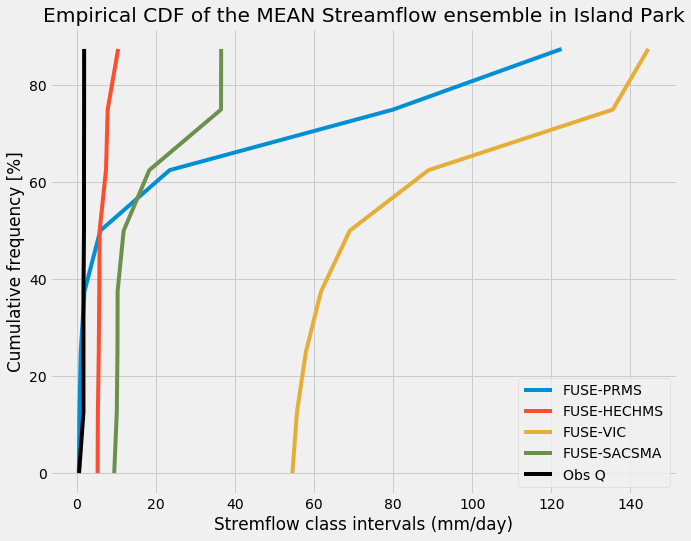

In [95]:
# Empirical CDF
plt.figure(figsize=(10,8))

meanprms = prmsq.mean(axis=1)
meanhechms = hechmsq.mean(axis=1)
meanvic = vicq.mean(axis=1)
meansacsma = sacsmaq.mean(axis=1)


plt.plot(np.sort(meanprms), np.linspace(0, 100, len(meanprms), endpoint=False), label = 'FUSE-PRMS')
plt.plot(np.sort(meanhechms), np.linspace(0, 100, len(meanhechms), endpoint=False), label = 'FUSE-HECHMS')
plt.plot(np.sort(meanvic), np.linspace(0, 100, len(meanvic), endpoint=False), label = 'FUSE-VIC')
plt.plot(np.sort(meansacsma), np.linspace(0, 100, len(meansacsma), endpoint=False), label = 'FUSE-SACSMA')

plt.plot(np.sort(qobs), np.linspace(0, 100, len(qobs), endpoint=False), label = 'Obs Q', color = 'black')
plt.ylabel('Cumulative frequency [%]')
plt.xlabel('Stremflow class intervals (mm/day)')
plt.title('Empirical CDF of the MEAN Streamflow ensemble in Island Park')
plt.legend()
plt.savefig('figures/empiricalcdf.png', bbox_inches='tight', dpi=300)
plt.show()

# Range of KGE values

In [96]:
prmskge = vextract(prmsparam, 'kge')
hechmskge = vextract(hechmsparam, 'kge')
vickge = vextract(vicparam, 'kge')
sacsmakge = vextract(sacsmaparam, 'kge')                                                        

KeyboardInterrupt: 

In [ ]:
kge = {}
kge['Mean KGE (PRMS)'] = prmskge.mean()
kge['Max KGE (PRMS)'] = prmskge.max()
kge['Min KGE (PRMS)'] = prmskge.min()
kge['Mean KGE (HEC-HMS)'] = hechmskge.mean()
kge['Max KGE (HEC-HMS)'] = hechmskge.max()
kge['Min KGE (HEC-HMS)'] = hechmskge.min()
kge['Mean KGE (VIC)'] = vickge.mean()
kge['Max KGE (VIC)'] = vickge.max()
kge['Min KGE (VIC)'] = vickge.min()
kge['Mean KGE (SAC-SMS)'] = sacsmakge.mean()
kge['Max KGE (SAC-SMA)'] = sacsmakge.max()
kge['Min KGE (SAC-SMA)'] = sacsmakge.min()

print('\n RANGE of KGE values for 100 ensembles')
for x in kge:
    print (x,':',kge[x])